In [1]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import sys
sys.path.insert(0, "../")

import pandas as pd 
import numpy as np
import torch
from torchsummary import summary

torch.cuda.is_available()

True

In [11]:
X = torch.tensor([
   [
       [
          [1111, 1112, 1113, 1114, 0, 0], # N 1 - F2
          [1211, 1212, 1213, 1214, 0, 0], # N 2:
          [1311, 1312, 1313, 1314, 0, 0]  # N 3:
       ],[
          [1121, 1122, 1123, 1124, 0, 0], # N 1 - F2
          [1221, 1222, 1223, 1224, 0, 0],
          [1321, 1322, 1323, 1324, 0, 0]
       ],
   ],[
       [
          [2111, 2112, 2113, 0, 0, 0], # N 1 - F2
          [2211, 2212, 2213, 0, 0, 0], # N 2:
          [2311, 2312, 2313, 0, 0, 0]  # N 3:
       ],[
          [2121, 2122, 2123, 0, 0, 0], # N 1 - F2
          [2221, 2222, 2223, 0, 0, 0],
          [2321, 2322, 2323, 0, 0, 0]
       ]
   ],[
       [
          [3111, 3112, 3113, 1, 0, 0], # N 1 - F2
          [3211, 3212, 3213, 1, 0, 0], # N 2:
          [3311, 3312, 3313, 0, 1, 0]  # N 3:
       ],[
          [3121, 3122, 3123, 0, 0, 0], # N 1 - F2
          [3221, 3222, 3223, 0, 1, 0],
          [3321, 3322, 3323, 0, 0, 0]
       ]
   ],[
       [[1, 2, 1, 0, 0, 0],
        [3, 4, 1, 0, 0, 0],
        [2, 1, 1, 0, 0, 0]],

       [[2, 2, 1, 0, 0, 0],
        [0, 2, 1, 0, 0, 0],
        [2, 4, 1, 0, 0, 0]],
   ]    
]).type('torch.FloatTensor').cpu()
print(X.shape) 


# X[:, :, :, pad_idx] = 99
# X[np.arange(pad_idx.shape[0]), :, :, [-2, -3, -1]]= 999

# (batch, out_features, nodes, time)
# X = X.permute(0,2,3,1)
print(X.shape, X.permute(0,1,3,2).shape)
# # X
feature_dim = 2
num_nodes = 3
batch_size = 4
pad_idx = torch.repeat_interleave(((~X.bool()).all(dim=feature_dim)).all(dim=1), repeats=num_nodes, dim=0).view(batch_size,3,-1)
print(pad_idx.shape)
out_length = 6
X.permute(1,0,2,3)[:, pad_idx[:,:,:out_length]] = 99
# X

torch.Size([4, 2, 3, 6])
torch.Size([4, 2, 3, 6]) torch.Size([4, 2, 6, 3])
torch.Size([4, 3, 6])


In [15]:
H.shape

torch.Size([4, 2, 4, 5])

In [16]:
out_length = 5

H.permute(1,0,2,3)[:, pad_idx[:,:,:out_length]] = 99

IndexError: The shape of the mask [4, 3, 5] at index 1 does not match the shape of the indexed tensor [2, 4, 4, 5] at index 2

In [323]:
print(pad_idx.shape) 
H.permute(0,2,3,1)[pad_idx, :] = 999

torch.Size([4, 4, 6])


In [14]:
H = torch.tensor([
   [
       [
          [1111, 1112, 1113,  0, 0], # N 1 - F2
          [1211, 1212, 1213,  0, 0], # N 2:
          [1311, 1312, 1313, 0, 0] ,
           [2, 1, 1, 0, 0] # N 3:
       ],[
          [1121, 1122, 1123, 0, 0], # N 1 - F2
          [1221, 1222, 1223, 0, 0],
          [1321, 1322, 1323,  0, 0],
           [2, 1, 1, 0, 0]
       ],
   ],[
       [
          [2111, 2112,  0, 0, 0], # N 1 - F2
          [2211, 2212,  0, 0, 0], # N 2:
          [2311, 2312,  0, 0, 0],
           [2, 1, 1,  0, 0]  # N 3:
       ],[
          [2121, 2122,  0, 0, 0], # N 1 - F2
          [2221, 2222,  0, 0, 0],
          [2321, 2322,  0, 0, 0],
           [2, 1, 1, 0,  0]
       ]
   ],[
       [
          [3111, 3112, 1, 0, 0], # N 1 - F2
          [3211, 3212,  1, 0, 0], # N 2:
          [3311, 3312,  0, 1, 0] ,
           [2, 1, 1, 0, 0] # N 3:
       ],[
          [3121, 3122,  0, 0, 0], # N 1 - F2
          [3221, 3222,  0, 1, 0],
          [3321, 3322,  0, 0, 0],
           [2, 1, 1, 0,0]
       ]
   ],[
       [
           [1, 2, 1,  0, 0],
           [3, 4, 1,  0, 0],
           [2, 1, 1,  0, 0],
           [2, 1, 1,  0, 0]
        ],

       [
           [2, 2, 1,  0, 0],
           [0, 2, 1,  0, 0],
           [2, 4, 1,  0, 0],
           [2, 1, 1,  0, 0]
        ],
   ]   
]).type('torch.FloatTensor').cpu()

In [303]:
torch.repeat_interleave(((~X.bool()).all(dim=feature_dim)).all(dim=1), repeats=num_nodes, dim=0).view(4,3,-1).shape

torch.Size([4, 3, 6])

In [312]:
graph = 2
node = 1

X[graph, node, 1, :]

tensor([3212., 3222.])

In [264]:
X.shape, X[1, 2, :, :]

(torch.Size([2, 3, 6, 2]),
 tensor([[2., 2.],
         [1., 4.],
         [1., 1.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]))

In [221]:
X.shape

torch.Size([3, 2, 3, 6])

In [236]:

torch.repeat_interleave(((~X.bool()).all(dim=3)).all(dim=1), repeats=3, dim=0)#.shape

tensor([[False, False, False, False,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False, False,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False,  True,  True,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False,  True],
        [False, False, False, False, False,  True]])

In [172]:
dim = 1 # 1 = per feature
((~X.bool()).all(dim=dim)),"", ((~X.bool()).all(dim=1)).all(dim=1), X.bool().all(dim=dim).shape, X.shape

(tensor([[[False, False, False, False,  True,  True],
          [False, False, False, False,  True,  True],
          [False, False, False, False,  True,  True]],
 
         [[False, False, False,  True,  True,  True],
          [False, False, False,  True,  True,  True],
          [False, False, False,  True,  True,  True]],
 
         [[False, False, False, False,  True,  True],
          [False, False, False,  True, False,  True],
          [False, False, False,  True, False,  True]]]),
 '',
 tensor([[False, False, False, False,  True,  True],
         [False, False, False,  True,  True,  True],
         [False, False, False, False, False,  True]]),
 torch.Size([3, 3, 6]),
 torch.Size([3, 2, 3, 6]))

In [174]:
X[:, :, ((~X.bool()).all(dim=1)).all(dim=1)] = 99
X

tensor([[[[ 1.,  2.,  1.,  1., 99., 99.],
          [ 3.,  4.,  1., 99., 99., 99.],
          [ 2.,  1.,  1.,  1.,  0., 99.]],

         [[ 2.,  2.,  1.,  1., 99., 99.],
          [ 2.,  2.,  1., 99., 99., 99.],
          [ 2.,  4.,  1.,  1.,  0., 99.]]],


        [[[ 1.,  2.,  1.,  0., 99., 99.],
          [ 3.,  4.,  1., 99., 99., 99.],
          [ 2.,  1.,  1.,  0.,  0., 99.]],

         [[ 2.,  2.,  1.,  0., 99., 99.],
          [ 0.,  2.,  1., 99., 99., 99.],
          [ 2.,  4.,  1.,  0.,  0., 99.]]],


        [[[ 1.,  2.,  1.,  1., 99., 99.],
          [ 3.,  0.,  1., 99., 99., 99.],
          [ 2.,  1.,  1.,  0.,  2., 99.]],

         [[ 2.,  2.,  1.,  0., 99., 99.],
          [ 2.,  2.,  1., 99., 99., 99.],
          [ 2.,  4.,  1.,  0.,  0., 99.]]]])

In [173]:
X

tensor([[[[1., 2., 1., 1., 0., 0.],
          [3., 4., 1., 1., 0., 0.],
          [2., 1., 1., 1., 0., 0.]],

         [[2., 2., 1., 1., 0., 0.],
          [2., 2., 1., 1., 0., 0.],
          [2., 4., 1., 1., 0., 0.]]],


        [[[1., 2., 1., 0., 0., 0.],
          [3., 4., 1., 0., 0., 0.],
          [2., 1., 1., 0., 0., 0.]],

         [[2., 2., 1., 0., 0., 0.],
          [0., 2., 1., 0., 0., 0.],
          [2., 4., 1., 0., 0., 0.]]],


        [[[1., 2., 1., 1., 0., 0.],
          [3., 0., 1., 0., 0., 0.],
          [2., 1., 1., 0., 2., 0.]],

         [[2., 2., 1., 0., 0., 0.],
          [2., 2., 1., 0., 2., 0.],
          [2., 4., 1., 0., 0., 0.]]]])

In [166]:
((~X.bool()).all(dim=1)).all(dim=1).shape

torch.Size([3, 6])

In [108]:
X[0, 0, :, :]

tensor([[1., 2., 1., 1., 0., 0.],
        [3., 4., 1., 1., 0., 0.],
        [2., 1., 1., 1., 0., 0.]])

In [61]:
np.arange(pad_idx)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [56]:
np.arange(pad_idx)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

tensor([[[[ 1., 99., 99., 99.,  0.,  0.],
          [ 3., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.]],

         [[ 2., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.]]],


        [[[ 1., 99., 99., 99.,  0.,  0.],
          [ 3., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.]],

         [[ 2., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.]]],


        [[[ 1., 99., 99., 99.,  0.,  0.],
          [ 3., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  2.,  0.]],

         [[ 2., 99., 99., 99.,  0.,  0.],
          [ 2., 99., 99., 99.,  2.,  0.],
          [ 2., 99., 99., 99.,  0.,  0.]]]])

# Building Block: Temporal Convolution

Below you find some sample code to test the temporal convolution. For verification you can use the example tensor some predefined weights.

In general, the `Conv2D` function from PyTorch requires some tensor with the dimensions `(N, C_in, H_in, W_in)`. In our case those dimensions corresponds to `(batch, features, nodes, time_steps)`.

In [ ]:
################################################
# Create example tensor                        #
# Either use a predefined tensor (uncomment)   #
# or use a random generated tensor (commented) #
################################################

# batch = 1
# features = 4
# time_steps = 6
# nodes = 3
# X = torch.randint(0, 10, (batch, features, nodes, time_steps)).type('torch.FloatTensor').cpu()

# Predefined example tensor for verification
X = torch.tensor([[
       [[1, 2, 1, 1],  # f1, n1 , t1 and t2 and t3 and t4
        [3, 4, 1, 1],  # f1, n2 , t1 and t2 and t3 and t4
        [2, 1, 1, 1]], # f1, n3 , t1 and t2 and t3 and t4
       [[2, 2, 1, 1],  # f2, n1 , t1 and t2 and t3 and t4
        [2, 2, 1, 1],  # f2, n2 , t1 and t2 and t3 and t4
        [2, 4, 1, 1]]  # f2, n3 , t1 and t2 and t3 and t4
     ]]).type('torch.FloatTensor').cpu()

X.shape
# x, y, z;Old: features, nodes, time; required: fearures, time, nodes
#X.permute(0,3,2,1)

In [119]:
###############################
# Create Temporal Convolution #
###############################
import sys
sys.path.insert(0, "../")

from model.temporal_info_graph import TemporalConvolution

# Custom kernel! Dimension (c_out, c_in, kernel[0], kernel[1])
weights = torch.ones_like(torch.randint(0, 10, (5, 3, 1, 3)).type('torch.FloatTensor'))

# c_in = features, c_out can be chosen, kernel = (1, x), where x is free number less than the number of time steps.
# Weights and activation are optional.
tempConv = TemporalConvolution(c_in=2, c_out=5, kernel=3)#, weights=weights, activation=None).cpu()
print(X.shape, tempConv(X).shape)
H = tempConv(X)

torch.Size([1, 2, 3, 6]) torch.Size([1, 5, 3, 4])


In [120]:
H

tensor([[[[ 0.0000e+00, -0.0000e+00,  9.4661e-01, -0.0000e+00],
          [ 0.0000e+00, -3.7209e-02,  9.4661e-01, -0.0000e+00],
          [-0.0000e+00, -1.2926e-02,  0.0000e+00, -6.1968e-03]],

         [[-1.8786e-02,  1.4412e+00, -1.3836e-02,  0.0000e+00],
          [-0.0000e+00,  3.2845e+00, -0.0000e+00,  1.0146e+00],
          [ 6.7680e-01,  0.0000e+00, -1.3836e-02,  1.0146e+00]],

         [[-9.9382e-03, -4.0544e-03,  0.0000e+00, -0.0000e+00],
          [-2.6611e-02,  0.0000e+00,  0.0000e+00, -0.0000e+00],
          [ 0.0000e+00, -0.0000e+00,  0.0000e+00, -2.5722e-03]],

         [[ 8.5557e-01,  6.0142e-01, -0.0000e+00,  6.1741e-01],
          [-3.6754e-02, -2.3182e-02, -0.0000e+00,  0.0000e+00],
          [-5.9868e-03,  0.0000e+00, -5.8827e-03,  6.1741e-01]],

         [[ 4.2488e-02,  4.6974e-01, -0.0000e+00,  1.5008e+00],
          [-4.7926e-02, -0.0000e+00, -1.8836e-03,  1.5008e+00],
          [-1.1306e-02,  3.5278e+00, -1.8836e-03,  1.5008e+00]]]],
       grad_fn=<LeakyReluBack

In [124]:
pad_idx = (X.sum(dim=2).squeeze().sum(dim=-2) == 0).sum()
H[:, :, :, pad_idx: ] = 0  # Set all values to that come after the padded value
H


tensor([[[[ 0.0000, -0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.0372,  0.0000,  0.0000],
          [-0.0000, -0.0129,  0.0000,  0.0000]],

         [[-0.0188,  1.4412,  0.0000,  0.0000],
          [-0.0000,  3.2845,  0.0000,  0.0000],
          [ 0.6768,  0.0000,  0.0000,  0.0000]],

         [[-0.0099, -0.0041,  0.0000,  0.0000],
          [-0.0266,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.0000,  0.0000,  0.0000]],

         [[ 0.8556,  0.6014,  0.0000,  0.0000],
          [-0.0368, -0.0232,  0.0000,  0.0000],
          [-0.0060,  0.0000,  0.0000,  0.0000]],

         [[ 0.0425,  0.4697,  0.0000,  0.0000],
          [-0.0479, -0.0000,  0.0000,  0.0000],
          [-0.0113,  3.5278,  0.0000,  0.0000]]]], grad_fn=<CopySlices>)

# Building Block: Spectral Convolution

Reference implementations: https://github.com/FelixOpolka/STGCN-PyTorch/blob/master/stgcn.py

In [ ]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


import torch
import numpy as np 

# Predefined example tensor for verification
X = torch.tensor([[
       [[1, 2, 1, 1],  # f1, n1 , t1 and t2 and t3 and t4
        [3, 4, 1, 1],  # f1, n2 , t1 and t2 and t3 and t4
        [2, 1, 1, 1]], # f1, n3 , t1 and t2 and t3 and t4
       [[2, 2, 1, 1],  # f2, n1 , t1 and t2 and t3 and t4
        [2, 2, 1, 1],  # f2, n2 , t1 and t2 and t3 and t4
        [2, 4, 1, 1]]  # f2, n3 , t1 and t2 and t3 and t4
     ]]).type('torch.FloatTensor').cpu()

A = torch.tensor([
    [0, 1, 0],
    [1, 0, 1], 
    [0, 1, 0]
    ]).type('torch.FloatTensor').cpu()

D = torch.diag(torch.sum(A, dim=0))
L = D - A

`torch.einsum(equation, *operands)`: This function provides a way of computing multilinear expressions (i.e. sums of products) using the Einstein summation convention.

**Equation**
* The left hand side lists the operands dimensions, separated by commas. There should be one index letter per tensor dimension. 
* The right hand side follows after -> and gives the indices for the output


In [ ]:
#################################################################################
# Check/Validation: This einsum corresponds to Adjacency multiplication in time #
#################################################################################

# lfs = torch.einsum("ij,jklm->kilm", [A, X.permute(3, 0, 2, 1)])
lfs = torch.einsum("ij,jklm->kilm", [A, X.permute(2, 0, 3, 1)])

print(lfs)#.permute(0, 2, 1, 3))
# Equal to A@X.permute(0,3,2,1)[0][i], i.e. multiplying the adjacency with the feature matrix at each time step.
# print(A@X.permute(0,3,2,1)[0][0])

In [ ]:
###############################
# Create Spectral Convolution #
###############################
import sys
sys.path.insert(0, "../")

from model.temporal_info_graph import SpectralConvolution

# To double check
weights = torch.eye(2).type('torch.FloatTensor')

# Weights and activation are optional.
specConv = SpectralConvolution(c_in=2, c_out=1, weights=weights, activation = None).cpu()
print(X.shape, specConv(X, A).shape, X.permute(0, 2, 1, 3).shape)
specConv(X, A)

# TemporalInfoGraph: Stacked temporal and spectral convolution.

In [ ]:
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

import torch
import numpy as np 

# Predefined example tensor for verification
X = torch.tensor([[
       [[1, 2, 1, 1],  # f1, n1 , t1 and t2 and t3 and t4
        [3, 4, 1, 1],  # f1, n2 , t1 and t2 and t3 and t4
        [2, 1, 1, 1]], # f1, n3 , t1 and t2 and t3 and t4
       [[2, 2, 1, 1],  # f2, n1 , t1 and t2 and t3 and t4
        [2, 2, 1, 1],  # f2, n2 , t1 and t2 and t3 and t4
        [2, 4, 1, 1]]  # f2, n3 , t1 and t2 and t3 and t4
     ]]).type('torch.FloatTensor').cpu()

A = torch.tensor([
    [0, 1, 0],
    [1, 0, 1], 
    [0, 1, 0]
    ]).type('torch.FloatTensor').cpu()

D = torch.diag(torch.sum(A, dim=0))
L = D - A

In [ ]:
import sys
sys.path.insert(0, "../")

from model.temporal_info_graph import TemporalInfoGraph

# dim_in corresponds to (H, W), here (nodes, time steps)
tig = TemporalInfoGraph(c_in=2, c_out=6, spec_out=9, out=7, dim_in=(3,4), tempKernel=3)
gbl, lcl  = tig(X, A)
print(X.shape)
print(gbl.shape)
# print(gbl)
print(lcl.shape)
# print(lcl)

In [ ]:
gbl.mean(dim=1).shape

# Data Investigation

In [ ]:
######################
# Data Investigation #
######################
import sys
sys.path.insert(0, "../")

from data.preprocessing import create_skeleton

df_val = create_skeleton(folder="../../../Datasets/Kinetics-skeleton/kinetics-skeleton/kinetics_val/", cat="val", lim=10, to_mongoDB=False)

In [ ]:
from visualization.animation import animate_skeleton

# It can be that we don't have a skeleton in each frame.
animate_skeleton(df_val.iloc[2], lim_frames=None)

In [ ]:
############################## 
# Example: Read from MongoDB #
##############################
import pymongo

db_url = ""
with open("../.mongoURL") as f:
        db_url = f.readlines()       

client = pymongo.MongoClient(db_url)

collection = client.temporal_info_graph["kinect-skeleton"]

cursor = collection.find({})
for document in cursor:
        doc = pd.DataFrame([document])
        break

# Get feature matrix for sample 1 and frame 1
X = np.asarray(doc.iloc[0]["frames"][0]["feature_matrices"][0])

In [ ]:
#####################################
# Visualize Feature Matrix (Static) #
#####################################
import numpy as np 
import networkx as nx 

from data import KINECT_ADJACENCY

G = nx.Graph(KINECT_ADJACENCY)
nx.draw(G, [(x,y) for x,y in X], node_size=50,with_labels=True)

In [30]:
import pymongo
import pandas as pd

db_url = ""
with open("../.mongoURL") as f:
        db_url = f.readlines()       

experiment = {"run_id": 85, "name": {"$regex": "MLP.*"} }


client = pymongo.MongoClient(db_url)

collection = client.temporal_info_graph["metrics"]

cursor = collection.find(experiment)

trains_loss = []
val_loss = []
val_top1 = []
val_top5 = []

for doc in cursor:
    
    if "loss" in doc["name"] and "train" in doc["name"]:
        trains_loss = (doc["steps"], doc["values"])
    elif "loss" in doc["name"] and "val" in doc["name"]:
        val_loss = (doc["steps"], doc["values"])
    elif "top1" in doc["name"] and "val" in doc["name"]:
        val_top1 = (doc["steps"], doc["values"])
    elif "top5" in doc["name"] and "val" in doc["name"]:
        val_top5 = (doc["steps"], doc["values"])


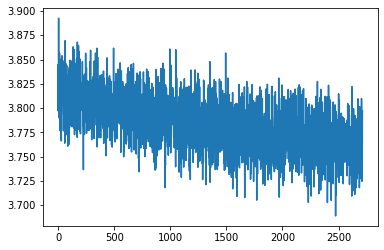

In [31]:
import numpy as np

import matplotlib.pyplot as plt

plt.plot(trains_loss[0], trains_loss[1])